# Outlier Detection in Regression

# Implementation of Cook's distance, Leverage points 

## Usual Regression

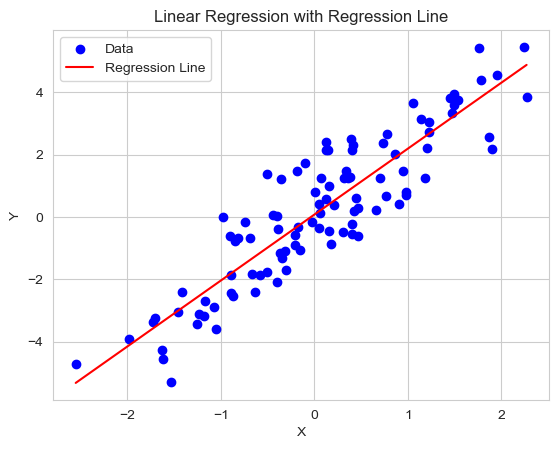

In [19]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Generate random data
np.random.seed(0)
x = np.random.normal(0, 1, 100)
y = 2 * x + np.random.normal(0, 1, 100)

# Fit the linear regression model
x_with_const = sm.add_constant(x)  # Added constant for intercept
model = sm.OLS(y, x_with_const).fit()

# Get the coefficients of the linear regression model
intercept, slope = model.params

# Plot the scatter plot of the data points
plt.scatter(x, y, color='blue', label='Data')

# Plot the regression line
x_values = np.linspace(min(x), max(x), 100)  # Generate x values for the line
y_values = intercept + slope * x_values       # Calculate corresponding y values
plt.plot(x_values, y_values, color='red', label='Regression Line')

# Add labels and title to the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with Regression Line')
plt.legend()

# Show the plot
plt.show()

## Leverage Point

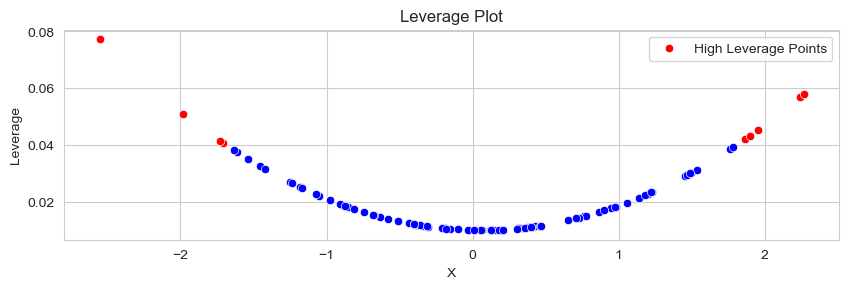

In [24]:
# Leverage calculation
leverage = model.get_influence().hat_matrix_diag

# Set threshold for identifying high leverage points
leverage_threshold = 2 * np.mean(leverage)  # You can adjust this threshold as needed

# Find high leverage points
high_leverage_indices = np.where(leverage > leverage_threshold)[0]

# Plot leverage plot
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
sns.scatterplot(x=x, y=leverage, color='blue')
sns.scatterplot(x=x[high_leverage_indices], y=leverage[high_leverage_indices], color='red', label='High Leverage Points')
plt.title('Leverage Plot')
plt.xlabel('X')
plt.ylabel('Leverage')



# Calculate Cook's distance
cook_distance = model.get_influence().cooks_distance[0]

# Identify leverage points
leverage_points = np.where(leverage > np.mean(leverage) + 2 * np.std(leverage))

# Identify influential observations based on Cook's distance
influential_observations = np.where(cook_distance > 4 / len(x))

## Influential Point Using Cook's Distance

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Outlier Indices: [ 0  4 83 85]


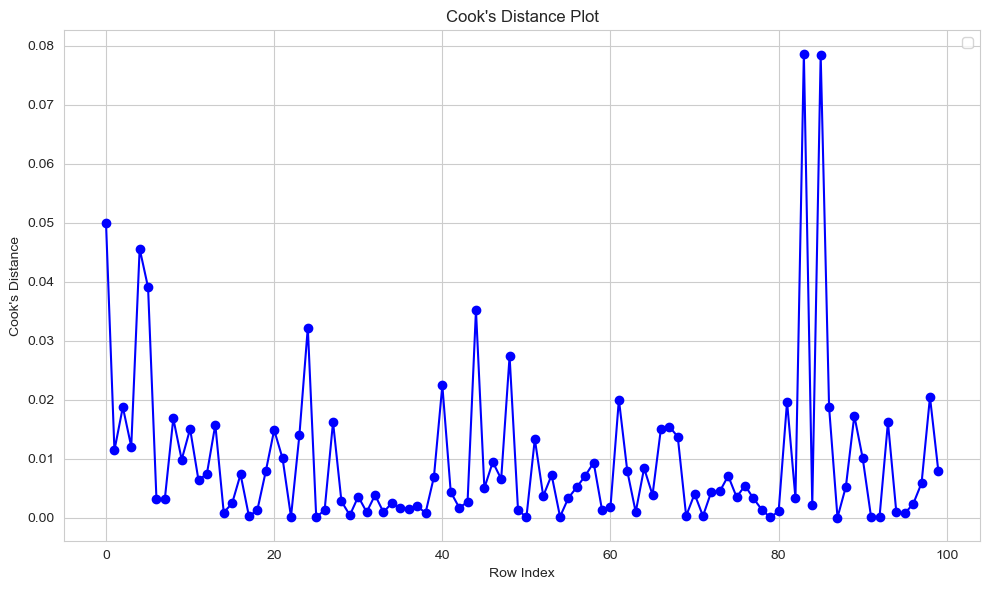

In [25]:
# Cook's distance calculations
cooks_distance = model.get_influence().cooks_distance[0]
# print(cooks_distance)

# Detecting outliers based on Cook's distance
outlier_indices = np.where(cooks_distance > 4 / len(x))[0]
print("Outlier Indices:", outlier_indices)


# Plot Cook's distance with respect to row index
plt.figure(figsize=(10, 6))
plt.plot(range(len(cooks_distance)), cooks_distance, color='blue', marker='o', linestyle='-')
plt.title("Cook's Distance Plot")
plt.xlabel('Row Index')
plt.ylabel("Cook's Distance")
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

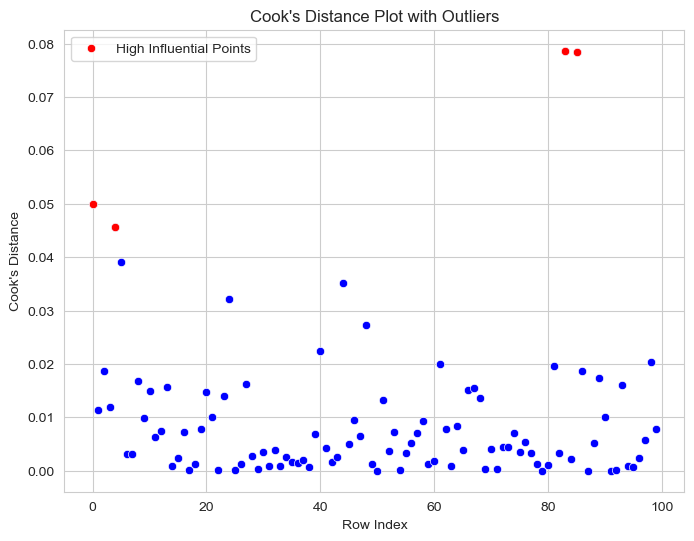

In [26]:
# Plot Cook's distance plot with outliers
plt.figure(figsize=(8, 6))
sns.scatterplot(x=range(len(cooks_distance)), y=cooks_distance, color='blue')
sns.scatterplot(x=outlier_indices, y=cooks_distance[outlier_indices], color='red', label='High Influential Points')
plt.title("Cook's Distance Plot with Outliers")
plt.xlabel('Row Index')
plt.ylabel("Cook's Distance")
plt.legend()

# Show the plot
plt.show()

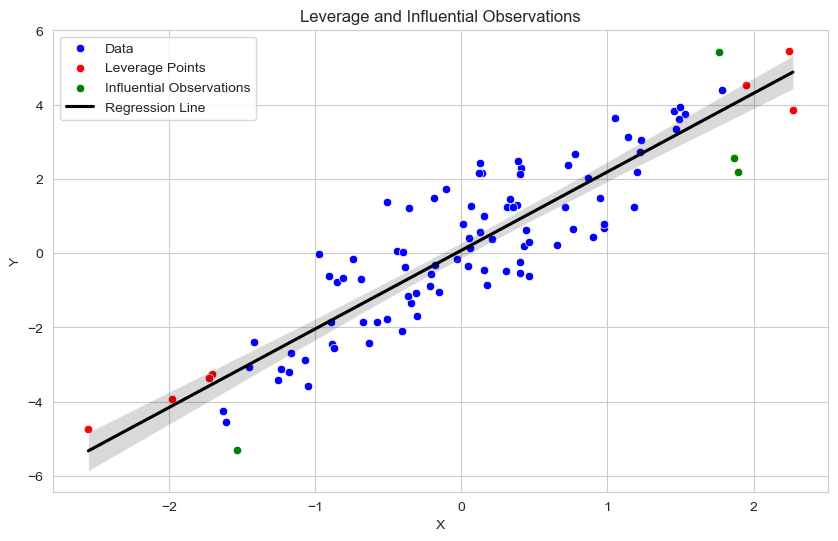

In [27]:
# Plot leverage and influential observations using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, color='blue', label='Data')
sns.scatterplot(x=x[high_leverage_indices], y=y[high_leverage_indices], color='red', label='Leverage Points')
sns.scatterplot(x=x[outlier_indices], y=y[outlier_indices], color='green', label='Influential Observations')
sns.regplot(x=x, y=y, scatter=False, color='black', label='Regression Line')

# Add labels and title to the plot
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Leverage and Influential Observations')
plt.legend()

# Show the plot
plt.show()

### Another Dataset

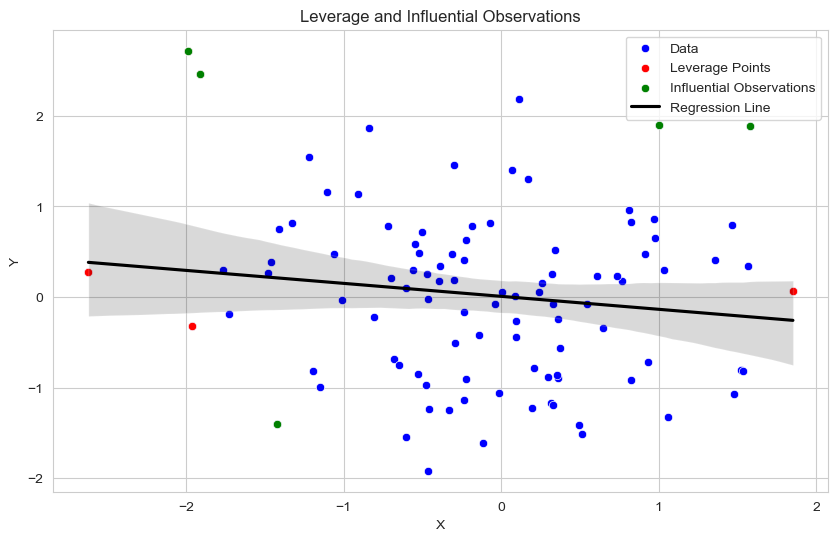

In [28]:
import statsmodels.api as sm
import numpy as np
import seaborn as sns

# Generate random data
np.random.seed(42)
x = np.random.normal(0, 1, 100)
y = np.random.normal(0, 1, 100)

# Fit the linear regression model
model = sm.OLS(y, sm.add_constant(x)).fit()

# Calculate leverage statistics
leverage = model.get_influence().hat_matrix_diag

# Calculate Cook's distance
cook_distance = model.get_influence().cooks_distance[0]

# Identify leverage points
leverage_points = np.where(leverage > np.mean(leverage) + 2 * np.std(leverage))

# Identify influential observations based on Cook's distance
influential_observations = np.where(cook_distance > 4 / len(x))

# Plot leverage and influential observations using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, color='blue', label='Data')
sns.scatterplot(x=x[leverage_points], y=y[leverage_points], color='red', label='Leverage Points')
sns.scatterplot(x=x[influential_observations], y=y[influential_observations], color='green', label='Influential Observations')
sns.regplot(x=x, y=y, scatter=False, color='black', label='Regression Line')

# Add labels and title to the plot
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Leverage and Influential Observations')
plt.legend()

# Show the plot
plt.show()